In [85]:
import torch

from torch import nn
torch.__version__

'2.6.0+cu124'

In [86]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [87]:
# getting data

import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
image_path=data_path/"pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists....skipping download")

else:
  print(f"{image_path} doesn't exist..... creating one")
  image_path.mkdir(parents=True, exist_ok=True)


with open(data_path /"pizza_steak_sushi.zip", "wb") as f:
    request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data.....")
    f.write(request.content)

with zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data...")
    zip_ref.extractall(image_path)



data/pizza_steak_sushi directory already exists....skipping download
Unzipping pizza, steak and sushi data...


In [88]:
from ast import walk
# Data preparation data exploration(Becoming one with the data)

import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)


there are 2 directories and 0 images in 'data/pizza_steak_sushi'.
there are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
there are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
there are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
there are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
there are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
there are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
there are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
there are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.


In [89]:
# setup train and testing paths

train_dir=image_path/"train"
test_dir=image_path/"test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path:data/pizza_steak_sushi/train/pizza/1105700.jpg
Image class:pizza
Image height:512
Image_width:512


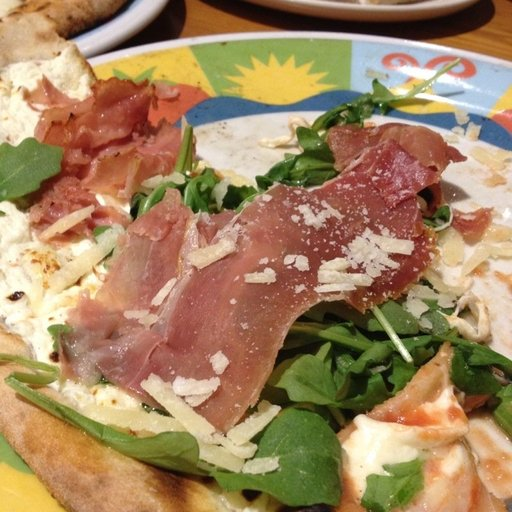

In [90]:
# Visualizing amd image

import random
from PIL import Image

# random.seed(42)

image_path_list=list(image_path.glob("*/*/*.jpg"))

image_path_list

random_image_path=random.choice(image_path_list)

image_class= random_image_path.parent.stem

img=Image.open(random_image_path)

# print metadata

print(f"Random image path:{random_image_path}")
print(f"Image class:{image_class}")
print(f"Image height:{img.height}")
print(f"Image_width:{img.width}")
img


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

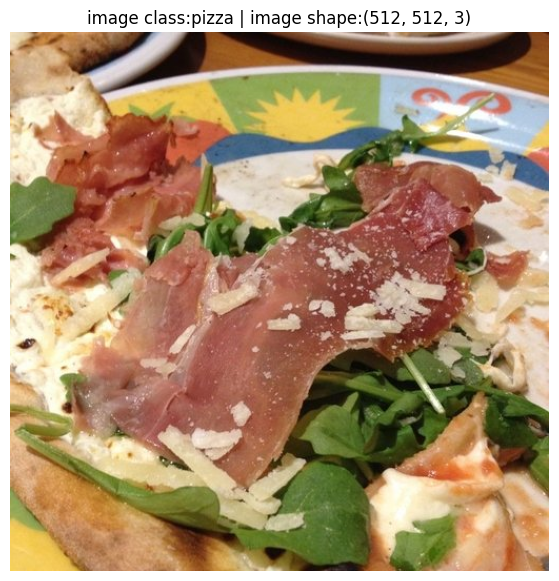

In [91]:
# try visualize image using matplotlib

import numpy as np
import matplotlib.pyplot as plt

img_as_array=np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"image class:{image_class} | image shape:{img_as_array.shape}")
plt.axis(False)

array([[[242, 224, 188],
        [241, 223, 187],
        [240, 221, 188],
        ...,
        [ 83,  24,   0],
        [ 75,  18,   0],
        [ 70,  13,   0]],

       [[243, 225, 189],
        [242, 224, 188],
        [240, 221, 188],
        ...,
        [103,  44,  12],
        [ 92,  33,   3],
        [ 82,  25,   0]],

       [[242, 224, 188],
        [241, 223, 187],
        [237, 221, 187],
        ...,
        [121,  62,  30],
        [110,  51,  19],
        [103,  44,  12]],

       ...,

       [[246, 210,  90],
        [246, 210,  90],
        [245, 208,  91],
        ...,
        [115,  97,  87],
        [117, 103, 100],
        [109,  99,  98]],

       [[245, 209,  87],
        [245, 209,  87],
        [246, 210,  90],
        ...,
        [105,  85,  74],
        [105,  90,  85],
        [105,  94,  92]],

       [[245, 209,  87],
        [246, 210,  88],
        [247, 211,  91],
        ...,
        [110,  90,  79],
        [108,  93,  88],
        [110,  99,  97]]], dtype=uint8)
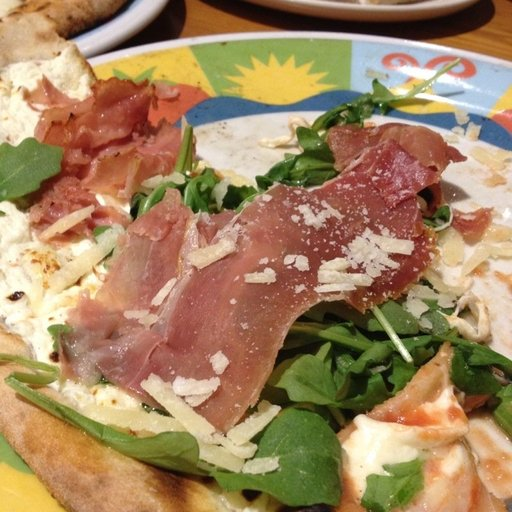

In [92]:
img_as_array

In [93]:
## Transforming data

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [94]:
# Transforming data with ToTensor

data_transform=transforms.Compose([

    transforms.Resize(size=(64, 64)),

    transforms.RandomHorizontalFlip(p=0.5),

    transforms.ToTensor()
])

In [95]:
data_transform(img).shape
data_transform(img).dtype

torch.float32

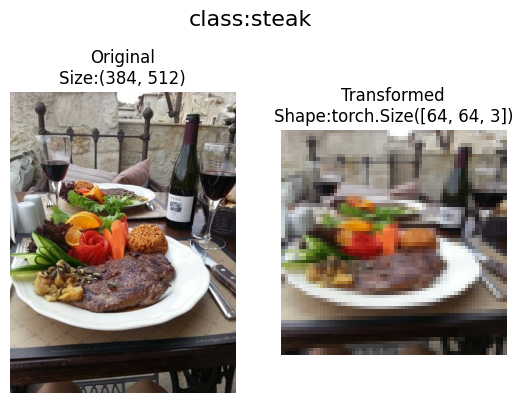

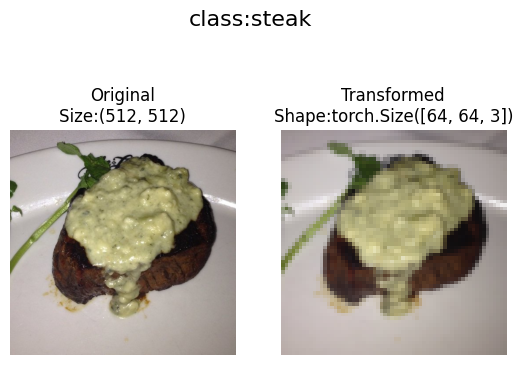

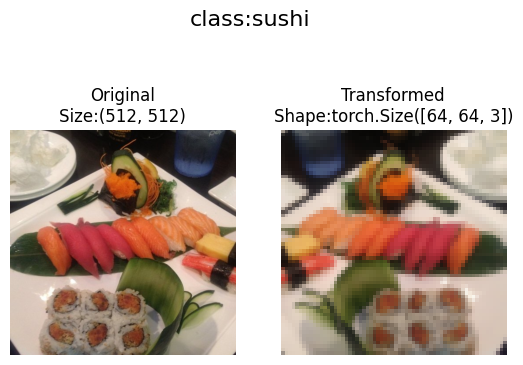

In [96]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):

  if seed:
    random.seed(seed)
  random_image_paths=random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax=plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize:{f.size}")
      ax[0].axis(False)

      transformed_image=transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape:{transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"class:{image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

In [97]:
# Loading image data using ImageFolder

from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform,
                                target_transform=None)

test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [98]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [99]:
# get class name as list
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [100]:
# get class name as dictionary
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [101]:
len(train_data), len(test_data)

(225, 75)

In [102]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [103]:
# index on the train_data dataset to get a single image ans label
img, label=train_data[0][0], train_data[0][1]
print(f"image tensor:{img}")
print(f"label:{label}")
print(f"image shape:{img.shape}")
print(f"image datatype:{img.dtype}")


image tensor:tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.090

In [104]:
class_names[label]

'pizza'

original shape:torch.Size([3, 64, 64])
permute shape:torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

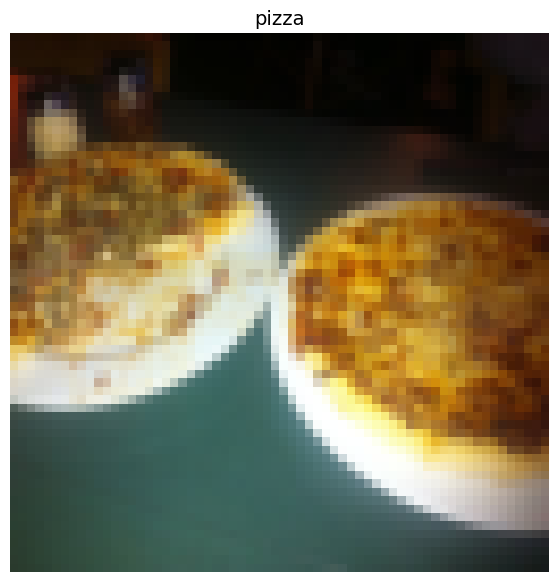

In [105]:
# Rearrange the order dimension

img_permute=img.permute(1,2,0)

print(f"original shape:{img.shape}")
print(f"permute shape:{img_permute.shape}")


# plot the image

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14)



In [106]:
# turn loaded image into DataLoader

from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            num_workers=1,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           num_workers=1,
                           shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c8ae9507150>,
 <torch.utils.data.dataloader.DataLoader at 0x7c8ace2e2c50>)

In [107]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [108]:
img, label=next(iter(train_dataloader))
print(f"image shape:{img.shape}")
print(f"label shape:{label.shape}")

image shape:torch.Size([32, 3, 64, 64])
label shape:torch.Size([32])


In [109]:
# Loading image data with custom dataset

import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [110]:
# instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [111]:
# creatimg a helper function to get class name

# setup the path directory
target_directory=train_dir
print(f"Target dir:{target_directory}")

# get the class names from the target directory

class_names_found=sorted(entry.name for entry in list(os.scandir(target_directory)))
class_names_found

Target dir:data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [112]:
list(os.scandir(target_directory))

[<DirEntry 'sushi'>, <DirEntry 'pizza'>, <DirEntry 'steak'>]

In [113]:
def find_classes(directory:str):

  classes=sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}")

  class_to_idx={class_name:i for i, class_name in enumerate(classes)}
  return classes, class_to_idx


In [114]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [115]:
# create a custom dataset to replicate ImageFolder

# write a custom dataset class
from torch.utils.data import Dataset
class ImageFolderCustom(Dataset):
  def __init__(self,
               targ_dir,
               transform=None):

    self.paths=list(pathlib.Path(targ_dir).glob("*/*.jpg"))

    self.transform=transform
    self.classes, self.class_to_idx=find_classes(targ_dir)


  def load_image(self, index:int):
    image_path=self.paths[index]
    return Image.open(image_path)

  def __len__(self):
    return len(self.paths)

  def __getitem__(self, index:int):
    img=self.load_image(index)
    class_name=self.paths[index].parent.name
    class_idx=self.class_to_idx[class_name]


    if self.transform:
      return self.transform(img), class_idx

    else:
      return img, class_idx

In [116]:
# create a transforms

train_transforms=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])


In [117]:
# test out ImageFolder

train_data_custom=ImageFolderCustom(targ_dir=train_dir,
                                    transform=train_transforms)

test_data_custom=ImageFolderCustom(targ_dir=test_dir,
                                    transform=test_transforms)

In [118]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7c8ace360790>,
 <__main__.ImageFolderCustom at 0x7c8ae96e2d50>)

In [119]:
len(train_data), len(train_data_custom)

(225, 225)

In [120]:
len(test_data), len(test_data_custom)

(75, 75)

In [121]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [122]:
test_data_custom.classes

['pizza', 'steak', 'sushi']

In [123]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [124]:
# check for equality between original ImageFolder and ImageFolderCustomDataset

print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


In [125]:
# create a function to display random images
## create a function to take in a dataset

def display_random_images(dataset: torch.utils.data.dataset,
                          classes:List[str]=None,
                          n:int=10,
                          display_shape:bool=True,
                          seed:int=None):

  if n>10:
    n=10
    display_shape=False
    print("for display purposes , n shouldn't be larger than 10, setting to 10 and removing")

  if seed:
    random.seed(seed)

  random_samples_idx=random.sample(range(len(dataset)), k=n)

  plt.figure(figsize=(16,8))

  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label=dataset[targ_sample][0], dataset[targ_sample][1]

    targ_image_adjust=targ_image.permute(1,2,0)

    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis(False)
    if classes:
      title=f"class:{classes[targ_label]}"
      if display_shape:
        title=title+f"\nshape:{targ_image_adjust.shape}"

    plt.title(title)


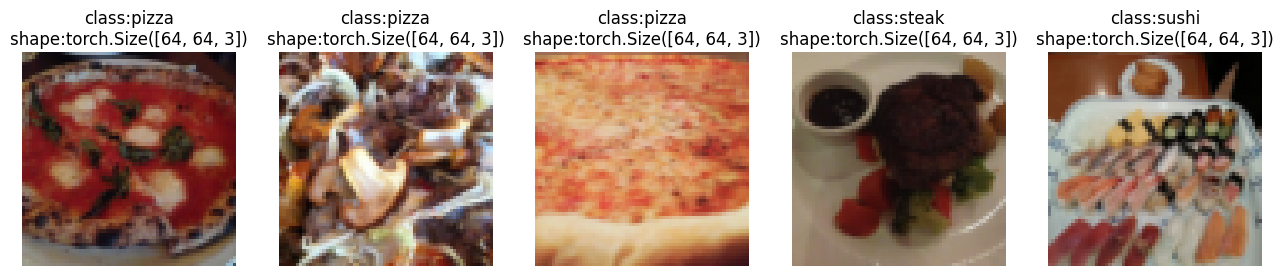

In [126]:
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

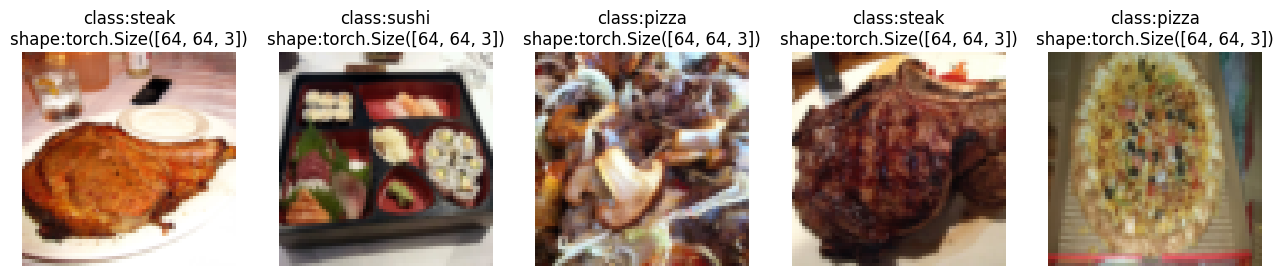

In [127]:
# display random images from the ImageFolderCustom dataset

display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

In [128]:
# turn loade image into dataloader

from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader_custom=DataLoader(dataset=train_data_custom,
                                   batch_size=BATCH_SIZE,
                                   num_workers=1,
                                   shuffle=True

)

test_dataloader_custom=DataLoader(dataset=test_data_custom,
                                  batch_size=BATCH_SIZE,
                                  num_workers=1,
                                  shuffle=False
)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7c8ae8af7150>,
 <torch.utils.data.dataloader.DataLoader at 0x7c8ae8a4e410>)

In [129]:
image_custom, label_custom=next(iter(train_dataloader_custom))

image_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [130]:
# other forms of transforms (data augmentation)

from torchvision import transforms

train_transform=transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform=transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [131]:
# get all image paths

image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/sushi/686426.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2017378.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/3360207.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/169392.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/765684.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2019344.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/385154.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1615453.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/700405.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2720223.jpg')]

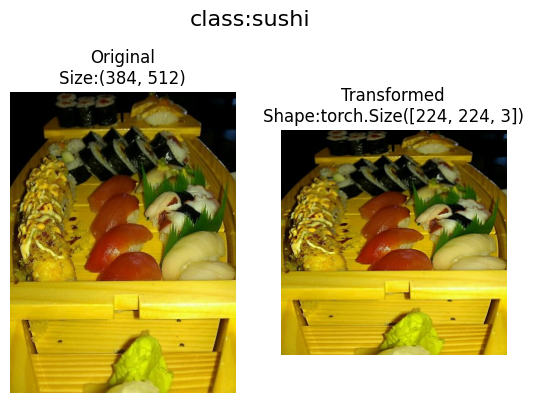

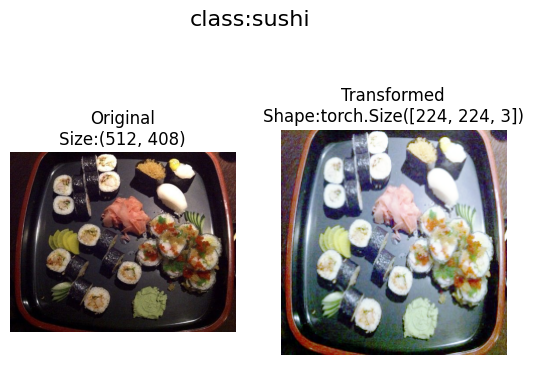

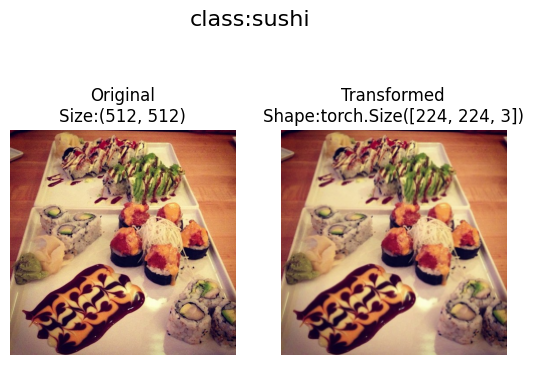

In [132]:
# plot random transformed images

plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

In [133]:
# Model 0:TinyVGG without data augmentation
## creating transforms and loading data
### create simple transforms

simple_transforms=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [134]:
# Load and transform data

from torchvision import datasets
train_data_simple=datasets.ImageFolder(root=train_dir,
                                       transform=simple_transforms)

test_data_simple=datasets.ImageFolder(root=test_dir,
                                         transform=simple_transforms)

# turn datasets into DataLoader

import os
from torch.utils.data import DataLoader

BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

train_dataloader_simple=DataLoader(dataset=train_data_simple,
                                   batch_size=BATCH_SIZE,
                                   shuffle=True,
                                   num_workers=NUM_WORKERS)

test_dataloader_simple=DataLoader(dataset=test_data_simple,
                                  batch_size=BATCH_SIZE,
                                  shuffle=False,
                                  num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7c8ae8896410>,
 <torch.utils.data.dataloader.DataLoader at 0x7c8ae88c3d10>)

In [135]:
## create TinyVGG model class

class TinyVGG(nn.Module):

  def __init__(self, input_shape:int,
               hidden_units:int,
               output_shape:int):

    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )



    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    x=self.conv_block_1(x)
    #print(x.shape)
    x=self.conv_block_2(x)
    #print(x.shape)
    x=self.classifier(x)
    #print(x.shape)
    return x


In [136]:
class_names

['pizza', 'steak', 'sushi']

In [137]:
torch.manual_seed(42)
model_0=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(class_names)).to(device)

model_0


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [138]:
## try a forward pass on a single image(t test the model)
## get single image

image_single, label_single=next(iter(train_dataloader_simple))

image_single.shape, label_single.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [139]:
# try forward pass

model_0(image_single.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [140]:
label_single.shape

torch.Size([32])

In [141]:
# USE torchinfo to get an idea of the shapes going through our model
## install torchinfo, import if it is available

try:
  import torchinfo
except:
  !pip install torchinfo

from torchinfo import summary
summary(model_0, input_size=(1, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [142]:
# create train and test loop functions

## create train step()

def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):

  model.train()

  train_loss, train_acc=0, 0

  for batch, (x,y) in enumerate(dataloader):
    x, y=x.to(device), y.to(device)
    y_pred=model(x)

    loss=loss_fn(y_pred, y)
    train_loss+=loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class=torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc+=(y_pred_class==y).sum().item()/len(y_pred)

  train_loss=train_loss/len(dataloader)
  train_acc=train_acc/len(dataloader)
  return train_loss, train_acc

In [143]:
# create a test step

def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device=device):

  model.eval()

  test_loss, test_acc=0, 0

  with torch.inference_mode():

    for batch, (x,y) in enumerate(dataloader):

      x, y=x.to(device), y.to(device)

      test_pred_logits=model(x)

      loss=loss_fn(test_pred_logits, y)
      test_loss+=loss.item()

      test_pred_labels=torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
      test_acc+=(test_pred_labels==y).sum().item()/len(test_pred_logits)

  test_loss=test_loss/len(dataloader)
  test_acc=test_acc/len(dataloader)
  return test_loss, test_acc




In [144]:
# creating a train() function to combine train_step() and test_step()

from tqdm.auto import tqdm

def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
          epochs:int=5,
          device=device
          ):

  results={"train_loss":[],
           "train_acc":[],
           "test_loss":[],
           "test_acc":[]}

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc=train_step(model=model,
                                     dataloader=train_dataloader,
                                     loss_fn=loss_fn,
                                     optimizer=optimizer,
                                     device=device)

    test_loss, test_acc=test_step(model=model,
                                  dataloader=test_dataloader,
                                  loss_fn=loss_fn,
                                  device=device
                                  )

    print(f"Epoch:{epoch} | Train loss:{train_loss:.4f} | Train acc:{train_acc:.4f} | Test loss:{test_loss:.4f} | Test acc:{test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results



In [145]:
# train and evaluate model_0

torch.manual_seed(42)

NUM_EPOCHS=5

model_0=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(train_data.classes)).to(device)


loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_0.parameters(),
                           lr=0.01)

from timeit import default_timer as timer
start_time=timer()

model_0_results=train(model=model_0,
                      train_dataloader=train_dataloader_simple,
                      test_dataloader=test_dataloader_simple,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)

end_time=timer()
print(f"Total training time:{end_time-start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0 | Train loss:1.2059 | Train acc:0.3438 | Test loss:1.1170 | Test acc:0.5417
Epoch:1 | Train loss:1.1660 | Train acc:0.2812 | Test loss:1.0799 | Test acc:0.5417
Epoch:2 | Train loss:1.1117 | Train acc:0.3008 | Test loss:1.1033 | Test acc:0.2282
Epoch:3 | Train loss:1.1000 | Train acc:0.2969 | Test loss:1.0926 | Test acc:0.5417
Epoch:4 | Train loss:1.0975 | Train acc:0.4023 | Test loss:1.0944 | Test acc:0.5417
Total training time:10.259 seconds


In [146]:
model_0_results

{'train_loss': [1.2059235125780106,
  1.1660106629133224,
  1.111730381846428,
  1.100031316280365,
  1.0974968671798706],
 'train_acc': [0.34375, 0.28125, 0.30078125, 0.296875, 0.40234375],
 'test_loss': [1.1170276999473572,
  1.0798708995183308,
  1.1033344268798828,
  1.092569907506307,
  1.0944202343622844],
 'test_acc': [0.5416666666666666,
  0.5416666666666666,
  0.228219696969697,
  0.5416666666666666,
  0.5416666666666666]}

In [147]:
# plot the loss curve of model_0
##  get the model_0_results keys

model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [148]:
def plot_loss_curves(results: Dict[str, list[float]]):

  loss=results["train_loss"]
  test_loss=results["test_loss"]

  accuracy=results["train_acc"]
  test_accuracy=results["test_acc"]

  epochs=range(len(results["train_loss"]))

  plt.figure(figsize=(15, 7))


  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.legend();

  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();


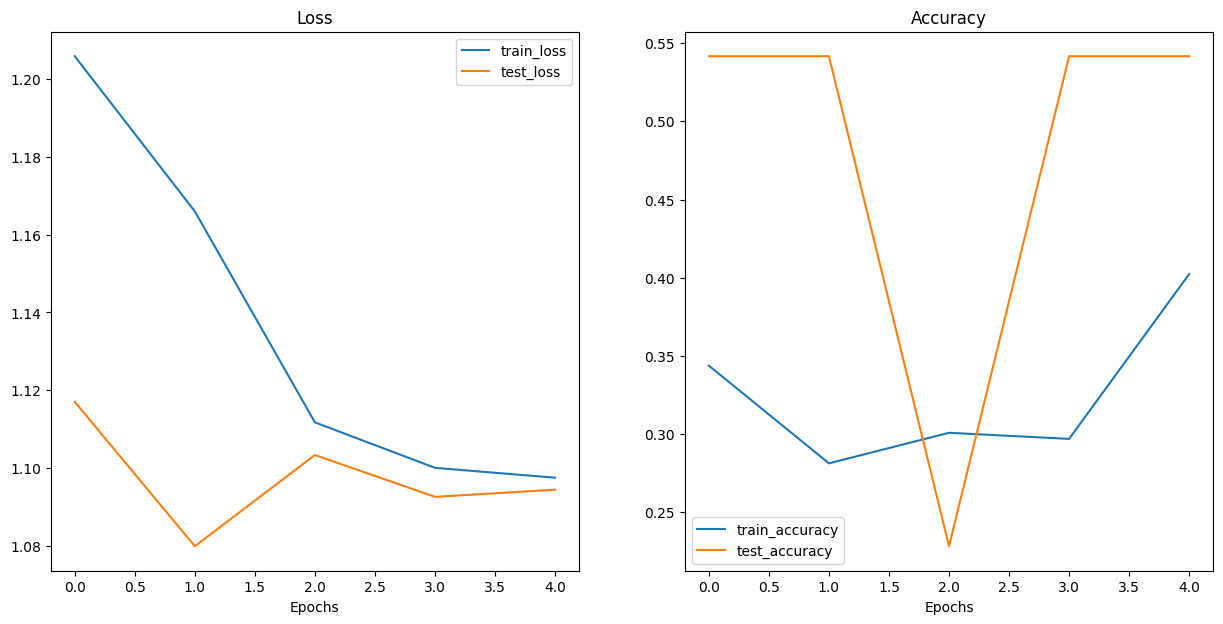

In [149]:
plot_loss_curves(model_0_results)

In [150]:
# model_1 TinyVGG with data augmentaion
# create training transform with TrivialAugment

from torchvision import transforms

train_transform_trivial=transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple= transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])


In [151]:
# create train and test dataset's and DataLoader's with data augmentation

# turn image folders into datastes

from torchvision import datasets

train_data_augmented=datasets.ImageFolder(root=train_dir,
                                          transform=train_transform_trivial)

test_data_simple=datasets.ImageFolder(root=test_dir,
                                      transform=test_transform_simple)



In [152]:
# turn the dataset into dataloaders

import os
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

torch.manual_seed(42)

train_dataloader_augmented=DataLoader(dataset=train_data_augmented,
                                      batch_size=BATCH_SIZE,
                                      shuffle=True,
                                      num_workers=NUM_WORKERS)

test_dataloader_simple=DataLoader(dataset=test_data_simple,
                                  batch_size=BATCH_SIZE,
                                  shuffle=False,
                                  num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7c8ae8891650>,
 <torch.utils.data.dataloader.DataLoader at 0x7c8ae8b52e10>)

In [153]:
# construct and train model_1
## create model_1 and seed it to the targeted devices

torch.manual_seed(42)

model_1=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(train_data_augmented.classes)).to(device)

model_1



TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [154]:
torch.manual_seed(42)

NUM_EPOCHS=5

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_1.parameters(),
                           lr=0.01)

from timeit import default_timer as timer
start_time=timer()

model_1_results=train(model=model_1,
                      train_dataloader=train_dataloader_augmented,
                      test_dataloader=test_dataloader_simple,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS,
                      device=device)

end_time=timer()
print(f"Total training time for model_1:{end_time-start_time} seconds")



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0 | Train loss:1.2118 | Train acc:0.4062 | Test loss:1.1691 | Test acc:0.2604
Epoch:1 | Train loss:1.1091 | Train acc:0.4141 | Test loss:1.1103 | Test acc:0.2604
Epoch:2 | Train loss:1.0885 | Train acc:0.4258 | Test loss:1.1164 | Test acc:0.2604
Epoch:3 | Train loss:1.1037 | Train acc:0.3047 | Test loss:1.1216 | Test acc:0.2604
Epoch:4 | Train loss:1.0866 | Train acc:0.4258 | Test loss:1.1276 | Test acc:0.2604
Total training time for model_1:11.069587091000017 seconds


In [ ]:
# plot the loss curves of model_1

plot_loss_curves(model_1_results)

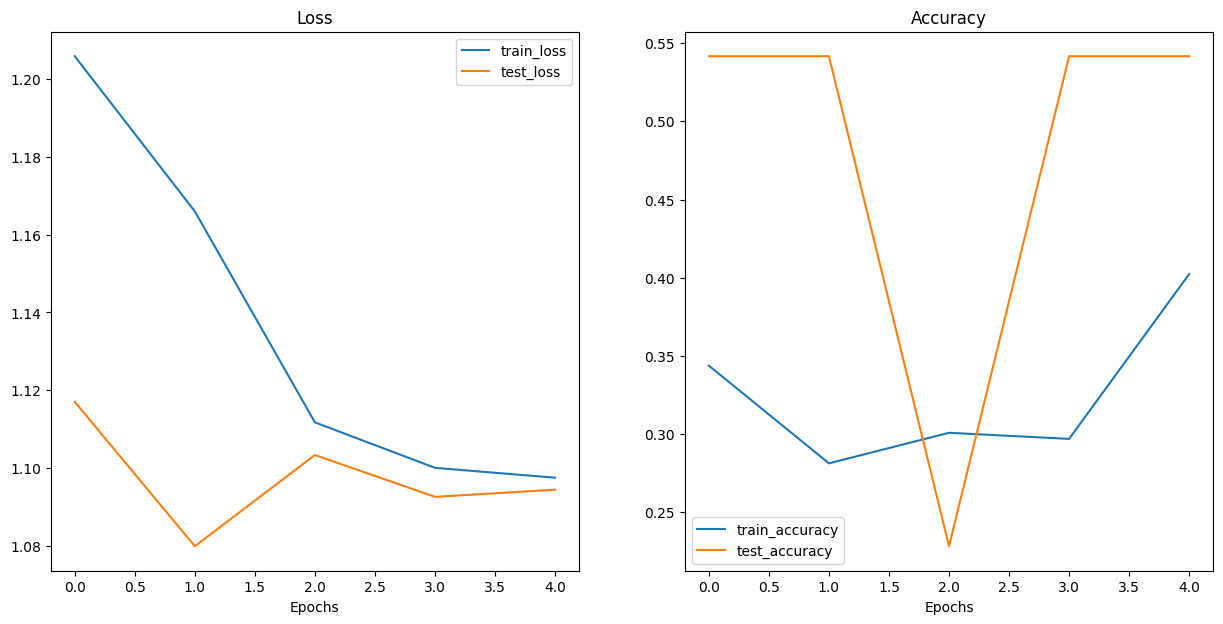

In [155]:
plot_loss_curves(model_0_results)

In [156]:
# compare model results

import pandas as pd
model_0_df=pd.DataFrame(model_0_results)
model_1_df=pd.DataFrame(model_1_results)

model_0_df


train_loss  train_acc  test_loss  test_acc
0    1.205924   0.343750   1.117028  0.541667
1    1.166011   0.281250   1.079871  0.541667
2    1.111730   0.300781   1.103334  0.228220
3    1.100031   0.296875   1.092570  0.541667
4    1.097497   0.402344   1.094420  0.541667

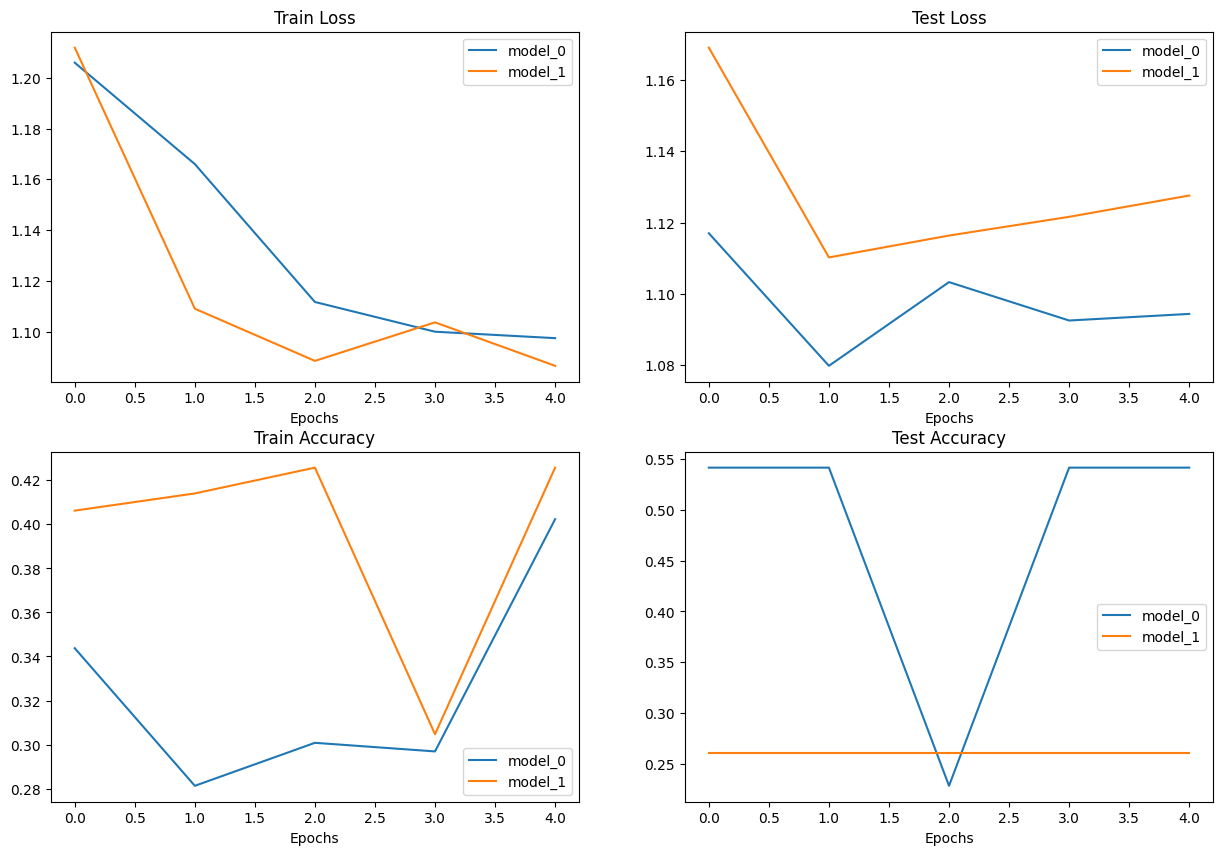

In [157]:
# setup a plot

plt.figure(figsize=(15, 10))

epochs=range(len(model_0_df))
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"], label="model_0")
plt.plot(epochs, model_1_df["train_loss"], label="model_1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["test_loss"], label="model_0")
plt.plot(epochs, model_1_df["test_loss"], label="model_1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["train_acc"], label="model_0")
plt.plot(epochs, model_1_df["train_acc"], label="model_1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"], label="model_0")
plt.plot(epochs, model_1_df["test_acc"], label="model_1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()






In [ ]:
# Making a prediction on a custom image

import requests

custom_image_path=data_path/"2-pizza-png-image.jpeg"

if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    requests=requests.get("https://raw.github.com/praful7159/Image/main/2-pizza-png-image.jpeg")
    print(f"Downloading {custom_image_path}.....")
    f.write(requests.content)

else:
  print(f"{custom_image_path} already exists, skipping download...")

In [158]:
custom_image_path

PosixPath('data/2-pizza-png-image.jpeg')

In [159]:
# Loading in a custom image with pytorch

import torchvision

# read in the image
custom_image_units8=torchvision.io.read_image(str(custom_image_path))
print(f"custom image tensor:{custom_image_units8}")
print(f"custom image shape:{custom_image_units8.shape}")
print(f"custom image datatype:{custom_image_units8.dtype}")

custom image tensor:tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)
custom image shape:torch.Size([3, 1871, 2916])
custom image datatype:torch.uint8


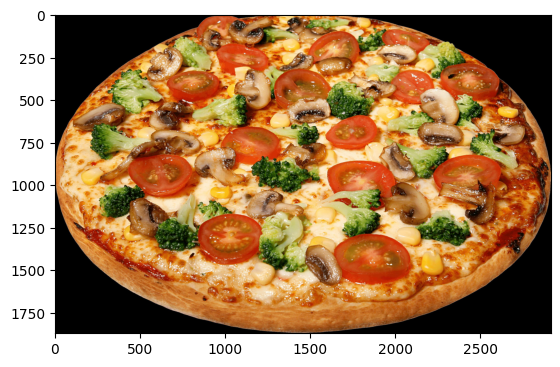

In [160]:
plt.imshow(custom_image_units8.permute(1,2,0))

In [191]:
# changing the datatype of custom_image_units8

custom_image=torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255
custom_image, custom_image.shape, custom_image.dtype

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 torch.Size([3, 1871, 2916]),
 torch.float32)

In [162]:
model_1.eval()
with torch.inference_mode():
  model_1(custom_image.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x336864 and 1690x3)

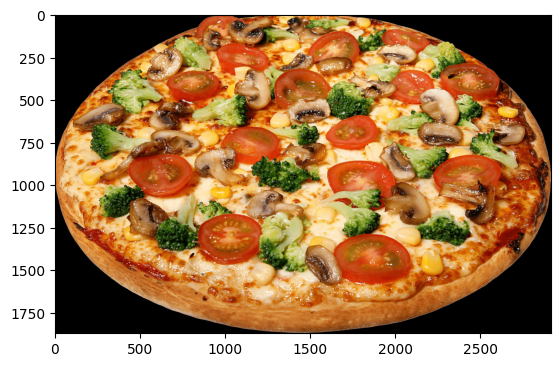

In [190]:
plt.imshow(custom_image.permute(1,2,0))

In [163]:
custom_image_transform=transforms.Compose([
    transforms.Resize(size=(64, 64))
])

custom_image_transformed=custom_image_transform(custom_image)

print(f"custom image shape:{custom_image.shape}")
print(f"custom transformed image:{custom_image_transformed.shape}")
print(f"custom image datatype:{custom_image.dtype}")
print(f"custom transformed image datatype:{custom_image_transformed.dtype}")

custom image shape:torch.Size([3, 1871, 2916])
custom transformed image:torch.Size([3, 64, 64])
custom image datatype:torch.float32
custom transformed image datatype:torch.float32


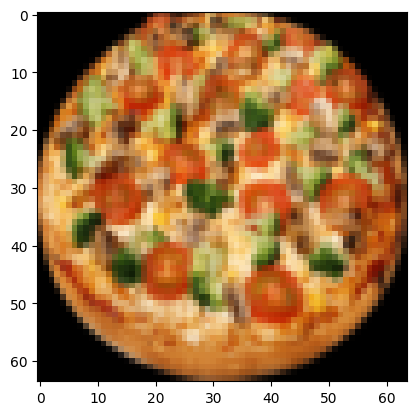

In [164]:
plt.imshow(custom_image_transformed.permute(1,2,0))

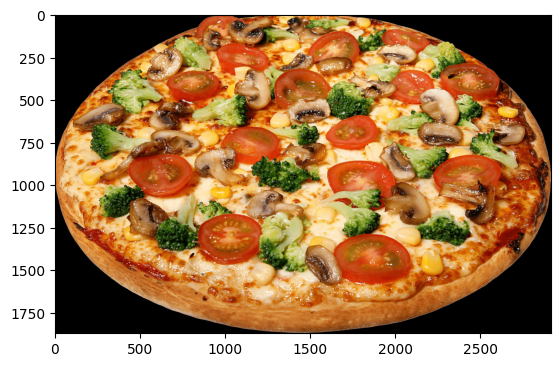

In [165]:
plt.imshow(custom_image.permute(1,2,0))

In [166]:
custom_image_transformed.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [167]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred=model_1(custom_image_transformed.unsqueeze(dim=0))
custom_image_pred


tensor([[ 0.1013, -0.0288, -0.1049]])

In [168]:
class_names

['pizza', 'steak', 'sushi']

In [169]:
custom_image_pred_probs=torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3715, 0.3262, 0.3023]])

In [170]:
custom_image_pred_label=torch.argmax(custom_image_pred_probs,dim=1)
custom_image_pred_label

tensor([0])

In [171]:
class_names[custom_image_pred_label]

'pizza'

In [189]:
# custom image prediction together:building a function

def pred_and_prob_image(model:torch.nn.Module,
                        image_path:str,
                        class_names:List[str]=None,
                        transform=None,
                        device=device):

  target_image=torchvision.io.read_image(str(image_path)).type(torch.float32)

  target_image=target_image/255

  if transform:
    target_image=transform(target_image)

  model.to(device)

  model.eval()
  with torch.inference_mode():
    target_image=target_image.unsqueeze(dim=0)

    target_image_pred=model(target_image.to(device))

  target_image_pred_prob=torch.softmax(target_image_pred, dim=1)
  target_image_pred_label=torch.argmax(target_image_pred_prob, dim=1)

  plt.imshow(target_image.squeeze().permute(1,2,0))
  if class_names:
    title=f"Pred:{class_names[target_image_pred_label.cpu()]} | Prob:{target_image_pred_prob.max().cpu():.3f}"

  else:
    title=f"Pred:{target_image_pred_label} | Prob:{target_image_pred_prob.max().cpu():.3f}"

  plt.title(title);
  plt.axis(False)

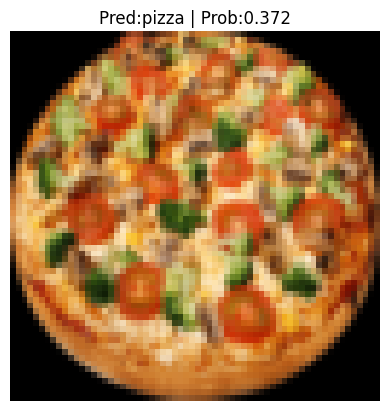

In [188]:
pred_and_prob_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device
              )